## Notebook for generating an example galaxy cluster model. 

This notebook goes through the steps to generate model data for galaxy cluster weak lensing observables.  In particular, we define a galaxy cluster model that follows and NFW distribution and generate various profiles for the model (mass density, convergence, shear, etc.), which we plot.  Note, a full pipeline to measure a galaxy cluster weak lensing mass requires fitting the observed (or mock) data to a model.  

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import clmm.modeling as m
from astropy.cosmology import FlatLambdaCDM

Define a cosmology using astropy

In [42]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.27, Ob0=0.045)

Define the galaxy cluster model.  Here, we choose parameters that describe the galaxy cluster model, including the mass definition, concentration, and mass distribution.  For the mass distribution, we choose a distribution that follows an NFW profile.

In [43]:
density_profile_parametrization = 'nfw'
mass_Delta = 200
cluster_mass = 1.e15
cluster_concentration = 4
z_cl = 0.3
z_source = 1.

Quick test of all modeling functionality

In [44]:
r3d = np.logspace(-2, 2, 100) # Mpc/h
r_proj = np.logspace(-2, 2, 100) # Mpc/h

In [45]:
rho = m.get_3d_density(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo, halo_profile_model=density_profile_parametrization)

In [46]:
Sigma = m.predict_surface_density(r_proj, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo, 
                                  delta_mdef=mass_Delta, 
                                  halo_profile_model=density_profile_parametrization)

In [47]:
DeltaSigma = m.predict_excess_surface_density(r_proj, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)

In [48]:
Sigmac = m.get_critical_surface_density(cosmo=cosmo, z_cluster=z_cl, z_source=z_source)

In [49]:
gammat = m.predict_tangential_shear(r_proj, mdelta=cluster_mass, cdelta=cluster_concentration, z_cluster=z_cl, 
                                    z_source=z_source, cosmo=cosmo, delta_mdef=mass_Delta, 
                                    halo_profile_model=density_profile_parametrization, 
                                    z_src_model='single_plane')

In [50]:
kappa = m.predict_convergence(r_proj, mdelta=cluster_mass, cdelta=cluster_concentration, 
                               z_cluster=z_cl, z_source=z_source,
                               cosmo=cosmo, delta_mdef=mass_Delta, 
                               halo_profile_model=density_profile_parametrization, 
                               z_src_model='single_plane')

In [51]:
gt = m.predict_reduced_tangential_shear(r_proj, mdelta=cluster_mass, cdelta=cluster_concentration, 
                                        z_cluster=z_cl, z_source=z_source, cosmo=cosmo, 
                                        delta_mdef=mass_Delta, 
                                        halo_profile_model=density_profile_parametrization, 
                                        z_src_model='single_plane')
        

Plot the predicted profiles

In [60]:
def plot_profile_3d(r, profile_vals, profile_label='rho'):
    plt.loglog(r, profile_vals)
    plt.xlabel('r [Mpc/h]', fontsize='x-large')
    plt.ylabel(profile_label, fontsize='x-large')
    
def plot_profile_proj(r, profile_vals, profile_label='rho'):
    plt.loglog(r, profile_vals)
    plt.xlabel('R [Mpc/h]', fontsize='x-large')
    plt.ylabel(profile_label, fontsize='x-large')

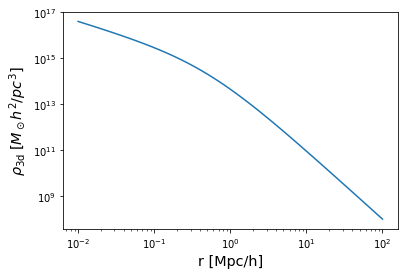

In [61]:
plot_profile_3d(r3d, rho, '$\\rho_{\\rm 3d}\\; [M_\odot h^2/pc^3]$')

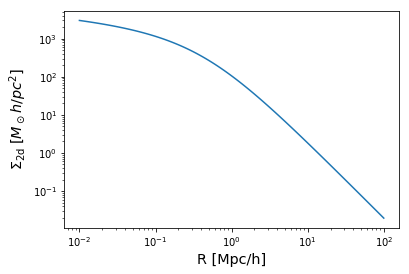

In [62]:
plot_profile_proj(r_proj, Sigma, '$\\Sigma_{\\rm 2d} \\; [M_\odot h/pc^2]$')

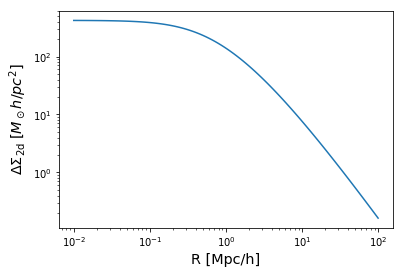

In [63]:
plot_profile_proj(r_proj, DeltaSigma, '$\\Delta\\Sigma_{\\rm 2d}\\; [M_\odot h/pc^2]$')

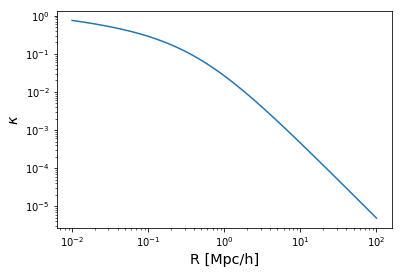

In [64]:
plot_profile_proj(r_proj, kappa, '$\\kappa$')

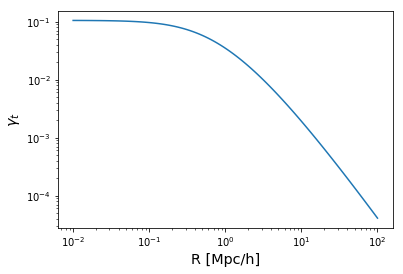

In [65]:
plot_profile_proj(r_proj, gammat, '$\\gamma_t$')

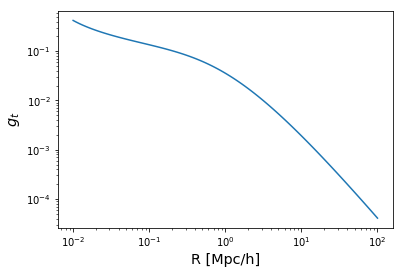

In [66]:
plot_profile_proj(r_proj, gt, '$g_t$')